<a href="https://colab.research.google.com/github/rktaira/Mackenzie/blob/main/ProjetoAplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Carregando a  base de dados

In [4]:
vac = pd.read_csv("/content/sample_data/COV_VAC_UPTAKE_2021_2023.csv") #Dados de vacinação
global_data = pd.read_csv("/content/sample_data/WHO-COVID-19-global-data.csv") #Dados de casos registrados e mortes
hosp_icu = pd.read_csv("/content/sample_data/WHO-COVID-19-global-hosp-icu-data.csv") #Dados de hospitalização
death_age = pd.read_csv("/content/sample_data/WHO-COVID-19-global-monthly-death-by-age-data.csv") #Dados de mortes por faixa etária

# **Análise exploratória inicial - Conhecendo as bases de dados**

# Base "COV_VAC_UPTAKE_2021_2023.csv"

In [5]:
vac.head()

,COUNTRY,COVID_VACCINE_ADM_TOT_A1D,COVID_VACCINE_ADM_TOT_BOOST,COVID_VACCINE_ADM_TOT_CPS,COVID_VACCINE_ADM_TOT_DOSES,COVID_VACCINE_ADM_TOT_DOSES_PER100,COVID_VACCINE_COV_TOT_A1D,COVID_VACCINE_COV_TOT_BOOST,COVID_VACCINE_COV_TOT_CPS,COVID_VACCINE_DATE_INTRO_FIRST,COVID_VACCINE_DATE_REPORT_TOT_LAST,DATE
0,BTN,187866.0,NaN,NaN,187866.0,24.0,24.0,NaN,NaN,2021-03-27,2022-10-30,2021-03-28
1,BTN,480836.0,NaN,NaN,480836.0,62.0,62.0,NaN,NaN,2021-03-27,2022-10-30,2021-04-25
2,BTN,483092.0,NaN,NaN,483092.0,63.0,63.0,NaN,NaN,2021-03-27,2022-10-30,2021-05-30
3,BTN,484797.0,NaN,490.0,485619.0,63.0,63.0,NaN,NaN,2021-03-27,2022-10-30,2021-06-27
4,BTN,530103.0,NaN,470465.0,1000568.0,130.0,69.0,NaN,61.0,2021-03-27,2022-10-30,2021-07-25


In [6]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   COUNTRY                             7608 non-null   object 
 1   COVID_VACCINE_ADM_TOT_A1D           7329 non-null   float64
 2   COVID_VACCINE_ADM_TOT_BOOST         4830 non-null   float64
 3   COVID_VACCINE_ADM_TOT_CPS           7101 non-null   float64
 4   COVID_VACCINE_ADM_TOT_DOSES         7426 non-null   float64
 5   COVID_VACCINE_ADM_TOT_DOSES_PER100  7199 non-null   float64
 6   COVID_VACCINE_COV_TOT_A1D           7112 non-null   float64
 7   COVID_VACCINE_COV_TOT_BOOST         4403 non-null   float64
 8   COVID_VACCINE_COV_TOT_CPS           6803 non-null   float64
 9   COVID_VACCINE_DATE_INTRO_FIRST      6807 non-null   object 
 10  COVID_VACCINE_DATE_REPORT_TOT_LAST  7375 non-null   object 
 11  DATE                                7608 no

In [7]:
vac["DATE"] = pd.to_datetime(vac["DATE"]) #Converte a data para formato datetime

In [8]:
vac.describe()

,COVID_VACCINE_ADM_TOT_A1D,COVID_VACCINE_ADM_TOT_BOOST,COVID_VACCINE_ADM_TOT_CPS,COVID_VACCINE_ADM_TOT_DOSES,COVID_VACCINE_ADM_TOT_DOSES_PER100,COVID_VACCINE_COV_TOT_A1D,COVID_VACCINE_COV_TOT_BOOST,COVID_VACCINE_COV_TOT_CPS,DATE
count,7.329000e+03,4.830000e+03,7.101000e+03,7.426000e+03,7199.000000,7112.000000,4403.000000,6803.000000,7608
mean,2.111683e+07,1.092436e+07,1.900064e+07,4.757045e+07,117.946937,52.242970,30.099705,48.450243,2022-07-29 06:47:41.829652992
min,1.100000e+01,1.000000e+00,2.000000e+00,2.000000e+01,1.000000,1.000000,1.000000,1.000000,2021-01-31 00:00:00
25%,1.916600e+05,4.307900e+04,1.630320e+05,3.554300e+05,44.000000,28.000000,8.000000,25.000000,2021-10-31 00:00:00
50%,1.951054e+06,5.756510e+05,1.427883e+06,3.026728e+06,110.000000,57.000000,28.000000,51.000000,2022-07-31 00:00:00
75%,7.978710e+06,4.364628e+06,6.887907e+06,1.707486e+07,182.000000,77.000000,51.000000,72.000000,2023-04-30 00:00:00
max,1.318027e+09,8.340601e+08,1.284480e+09,3.516881e+09,470.000000,100.000000,83.000000,100.000000,2023-12-31 00:00:00
std,1.049170e+08,5.811423e+07,9.849577e+07,2.480843e+08,84.021303,28.418711,22.950984,27.710033,NaN


Descrição das colunas apresentadas na base de dados:

COUNTRY:	Nome do país (texto)

COVID_VACCINE_ADM_TOT_A1D:	Número total de pessoas que receberam pelo menos 1 dose de vacina COVID-19 (cumulativo) “At least 1 Dose”. (numérico float)

COVID_VACCINE_ADM_TOT_BOOST:	Número total de doses de reforço administradas. (numérico float)

COVID_VACCINE_ADM_TOT_CPS:	Número total de pessoas completamente vacinadas. “Completed Primary Series”. (numérico float)

COVID_VACCINE_ADM_TOT_DOSES:	Total de doses administradas (soma de todas as doses, incluindo primeiras, segundas e reforços). (numérico float)

COVID_VACCINE_ADM_TOT_DOSES_PER100:	Total de doses administradas por 100 habitantes. (numérico float)

COVID_VACCINE_COV_TOT_A1D:	Cobertura vacinal (% da população que recebeu pelo menos 1 dose). (numérico float)

COVID_VACCINE_COV_TOT_BOOST:	Cobertura vacinal (% da população que recebeu dose de reforço). (numérico float)

COVID_VACCINE_COV_TOT_CPS:	Cobertura vacinal (% da população que completou a série primária). (numérico float)

COVID_VACCINE_DATE_INTRO_FIRST:	Data da introdução da primeira vacina COVID-19 no país. (Texto)

COVID_VACCINE_DATE_REPORT_TOT_LAST:	Data do último relatório de vacinação total recebido pela OMS. (Texto)

DATE:	Data de referência do registro. (Data)

# Base "WHO-COVID-19-global-data.csv"

In [9]:
global_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AM,Armenia,EURO,NaN,0,NaN,0
1,2020-01-12,AM,Armenia,EURO,NaN,0,NaN,0
2,2020-01-19,AM,Armenia,EURO,NaN,0,NaN,0
3,2020-01-26,AM,Armenia,EURO,NaN,0,NaN,0
4,2020-02-02,AM,Armenia,EURO,NaN,0,NaN,0


In [10]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70800 entries, 0 to 70799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      70800 non-null  object 
 1   Country_code       70505 non-null  object 
 2   Country            70800 non-null  object 
 3   WHO_region         65490 non-null  object 
 4   New_cases          48459 non-null  float64
 5   Cumulative_cases   70800 non-null  int64  
 6   New_deaths         35569 non-null  float64
 7   Cumulative_deaths  70800 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.3+ MB


In [11]:
global_data["Date_reported"] = pd.to_datetime(global_data["Date_reported"]) #Converte a data para formato Datetime

In [12]:
global_data.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,70800,4.845900e+04,7.080000e+04,35569.000000,7.080000e+04
mean,2022-10-30 00:00:00,1.606591e+04,2.057468e+06,199.629481,2.175189e+04
min,2020-01-05 00:00:00,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,2021-05-30 00:00:00,1.100000e+01,6.607000e+03,0.000000,4.100000e+01
50%,2022-10-30 00:00:00,1.760000e+02,6.087400e+04,6.000000,6.900000e+02
75%,2024-03-31 00:00:00,2.308000e+03,6.611030e+05,52.000000,7.993250e+03
max,2025-08-24 00:00:00,4.047548e+07,1.034368e+08,47687.000000,1.226890e+06
std,NaN,2.431347e+05,8.559008e+06,1026.399484,8.705149e+04


Colunas apresentadas na base de dados:

Date_reported:	Data de notificação (data)

Country_code:	Código ISO Alpha-2 do país (ex.: BR para Brasil) (texto)

Country: Nome do país ou território. (texto)

WHO_region:	Região da OMS à qual o país pertence. (texto)

New_cases: Número de novos casos confirmados de COVID-19. (numérico float)

Cumulative_cases: Número acumulado de casos confirmados. (numérico int)

New_deaths: Número de novas mortes atribuídas à COVID-19. (numérico float)

Cumulative_deaths: Número acumulado de mortes confirmadas por COVID-19. (numérico int)

# Base "WHO-COVID-19-global-hosp-icu-data.csv"

In [13]:
hosp_icu.head()

,Date_reported,Country_code,Country,WHO_region,Covid_new_hospitalizations_last_7days,Covid_new_icu_admissions_last_7days,Covid_new_hospitalizations_last_28days,Covid_new_icu_admissions_last_28days
0,2025-08-24,AFG,AFGHANISTAN,EMR,NaN,NaN,NaN,NaN
1,2025-08-24,ALB,ALBANIA,EUR,NaN,NaN,NaN,NaN
2,2025-08-24,DZA,ALGERIA,AFR,NaN,NaN,NaN,NaN
3,2025-08-24,ASM,AMERICAN SAMOA,WPR,NaN,NaN,NaN,NaN
4,2025-08-24,AND,ANDORRA,EUR,NaN,NaN,NaN,NaN


In [14]:
hosp_icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70800 entries, 0 to 70799
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date_reported                           70800 non-null  object 
 1   Country_code                            70800 non-null  object 
 2   Country                                 70800 non-null  object 
 3   WHO_region                              70800 non-null  object 
 4   Covid_new_hospitalizations_last_7days   17925 non-null  float64
 5   Covid_new_icu_admissions_last_7days     11618 non-null  float64
 6   Covid_new_hospitalizations_last_28days  19587 non-null  float64
 7   Covid_new_icu_admissions_last_28days    13175 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.3+ MB


In [15]:
hosp_icu["Date_reported"] = pd.to_datetime(hosp_icu["Date_reported"]) #Converte a data para formato Datetime

In [16]:
hosp_icu.describe()

,Date_reported,Covid_new_hospitalizations_last_7days,Covid_new_icu_admissions_last_7days,Covid_new_hospitalizations_last_28days,Covid_new_icu_admissions_last_28days
count,70800,17925.000000,11618.000000,19587.000000,13175.000000
mean,2022-10-30 00:00:00,1539.579693,121.372784,5635.029254,428.081442
min,2020-01-05 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2021-05-30 00:00:00,4.000000,0.000000,10.000000,1.000000
50%,2022-10-30 00:00:00,58.000000,4.000000,178.000000,12.000000
75%,2024-03-31 00:00:00,544.000000,34.000000,1863.500000,107.000000
max,2025-08-24 00:00:00,248207.000000,9694.000000,794279.000000,33008.000000
std,NaN,7140.266765,478.730655,26005.789251,1742.188645


Colunas apresentadas na base de dados:

Date_reported:	Data de notificação. (Data)

Country_code	Código ISO Alpha-2 do país (BR = Brasil). (Texto)

Country	Nome do país ou território conforme a nomenclatura da OMS. (Texto)

WHO_region	Região da OMS à qual o país pertence. (Texto)

Covid_new_hospitalizations_last_7days: Número de novas hospitalizações por COVID-19 nos últimos 7 dias. (Numérico Float)

Covid_new_icu_admissions_last_7days: Número de novas admissões em unidades de terapia intensiva (UTI) por COVID-19 nos últimos 7 dias. (Numérico Float)

Covid_new_hospitalizations_last_28days: Número de novas hospitalizações por COVID-19 nos últimos 28 dias. (Numérico Float)

Covid_new_icu_admissions_last_28days Número de novas admissões em UTI por COVID-19 nos últimos 28 dias. (Numérico Float)

# Base "WHO-COVID-19-global-monthly-death-by-age-data.csv"

In [17]:
death_age.head()

,Country,Country_code,Who_region,Wb_income,Year,Month,Agegroup,Deaths
0,Kuwait,KWT,EMR,HIC,2025,7,15_64,NaN
1,Holy See,VAT,EUR,NaN,2025,3,65+,NaN
2,Holy See,VAT,EUR,NaN,2025,4,15_64,NaN
3,Holy See,VAT,EUR,NaN,2025,4,5_14,NaN
4,Holy See,VAT,EUR,NaN,2025,4,65+,NaN


In [18]:
death_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71824 entries, 0 to 71823
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       71824 non-null  object 
 1   Country_code  71824 non-null  object 
 2   Who_region    71288 non-null  object 
 3   Wb_income     57620 non-null  object 
 4   Year          71824 non-null  int64  
 5   Month         71824 non-null  int64  
 6   Agegroup      71824 non-null  object 
 7   Deaths        18062 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 4.4+ MB


In [19]:
death_age.describe()

,Year,Month,Deaths
count,71824.000000,71824.000000,18062.000000
mean,2022.313433,6.238806,221.342321
std,1.622695,3.416793,1722.708875
min,2020.000000,1.000000,0.000000
25%,2021.000000,3.000000,0.000000
50%,2022.000000,6.000000,0.000000
75%,2024.000000,9.000000,6.000000
max,2025.000000,12.000000,85228.000000


Country:	Nome do país ou território. (Texto)

Country_code:	Código ISO Alpha-2 do país (BR = Brasil). (Texto)

Who_region:	Região da OMS à qual o país pertence. (Texto)

Wb_income: Categoria de renda do país, segundo o "World Bank income classification": (Texto)

*   LIC – Low income (baixa renda)
*   LMC – Lower middle income (renda média-baixa)
*   UMC – Upper middle income (renda média-alta)
*   HIC – High income (alta renda)

Year: Ano de referência do registro. (Numérico Inteiro)

Month: Mês de referência do registro. (Numérico Inteiro)

Agegroup: Faixa etária das pessoas falecidas (exemplos:0-4, 5-14, 85+). (Texto)

Deaths: Número total de mortes por COVID-19 notificadas nesse mês e faixa etária. (Numérico Float)

# Agrupando dados de países de interesse

Para fazer a análise de forma direcionada, será necessário agrupar os dados de um mesmo país. Para este estudo, escolhemos fazer a análise para Brasil, Japão, Italia, Suecia e Colômbia.

In [20]:
paises = ["Brazil", "Japan", "Italy", "Sweden", "Colombia"]
dados_paises = global_data.loc[global_data["Country"].isin(paises)] #Cria uma base de dados apenas com os países que utilizaremos na análise
print(dados_paises.head())

     Date_reported Country_code Country WHO_region  New_cases  \
8390    2020-01-05           BR  Brazil       AMRO        NaN   
8391    2020-01-12           BR  Brazil       AMRO        NaN   
8392    2020-01-19           BR  Brazil       AMRO        NaN   
8393    2020-01-26           BR  Brazil       AMRO        NaN   
8394    2020-02-02           BR  Brazil       AMRO        NaN   

      Cumulative_cases  New_deaths  Cumulative_deaths  
8390                 0         NaN                  0  
8391                 0         NaN                  0  
8392                 0         NaN                  0  
8393                 0         NaN                  0  
8394                 0         NaN                  0  


Criando um gráfico de casos acumulados.

In [45]:
#Agrupa as linhas com mesmo País e mesma data, e soma os valores.
dados_agrupados = dados_paises.groupby(["Country", "Date_reported"])["Cumulative_cases"].sum().reset_index()
print(dados_agrupados.head())

  Country Date_reported  Cumulative_cases
0  Brazil    2020-01-05                 0
1  Brazil    2020-01-12                 0
2  Brazil    2020-01-19                 0
3  Brazil    2020-01-26                 0
4  Brazil    2020-02-02                 0


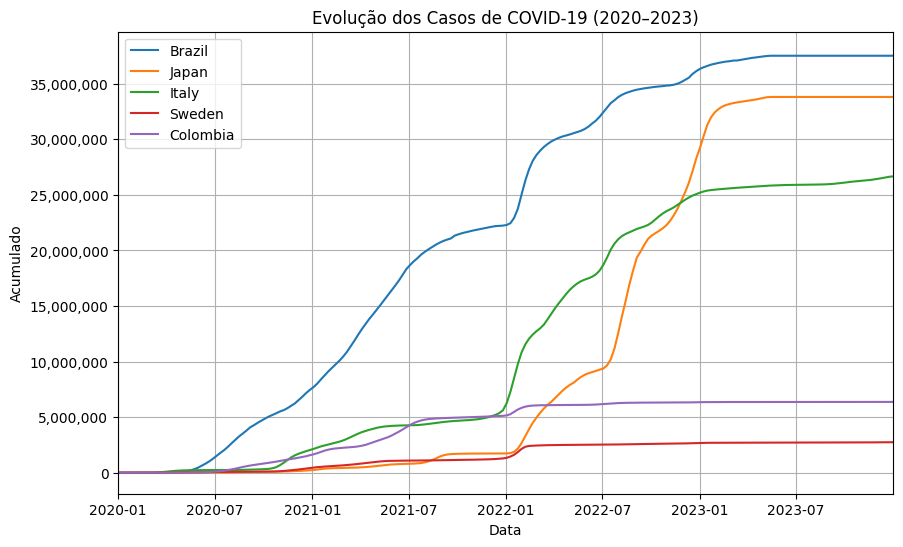

In [38]:
# Criando o gráfico de linha dos 5 países:
plt.figure(figsize=(10,6))

# Loop pelos países para desenhar cada linha
for pais in paises:
    dados = dados_agrupados[dados_agrupados["Country"] == pais]
    plt.plot(dados["Date_reported"], dados["Cumulative_cases"], label=pais)

# Títulos e legendas
plt.title("Evolução dos Casos de COVID-19 (2020–2023)")
plt.xlabel("Data")
plt.ylabel("Acumulado")
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31")) #Limitando o eixo X até 2023, quando não houve mais aumento significativo
plt.ticklabel_format(style='plain', axis='y')  # desativa notação científica
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Criando um gráfico de média móvel de 7 dias de novos casos.

  Country Date_reported  Cumulative_cases  media_movel_7d
0  Brazil    2020-01-05                 0             NaN
1  Brazil    2020-01-12                 0             NaN
2  Brazil    2020-01-19                 0             NaN
3  Brazil    2020-01-26                 0             NaN
4  Brazil    2020-02-02                 0             NaN


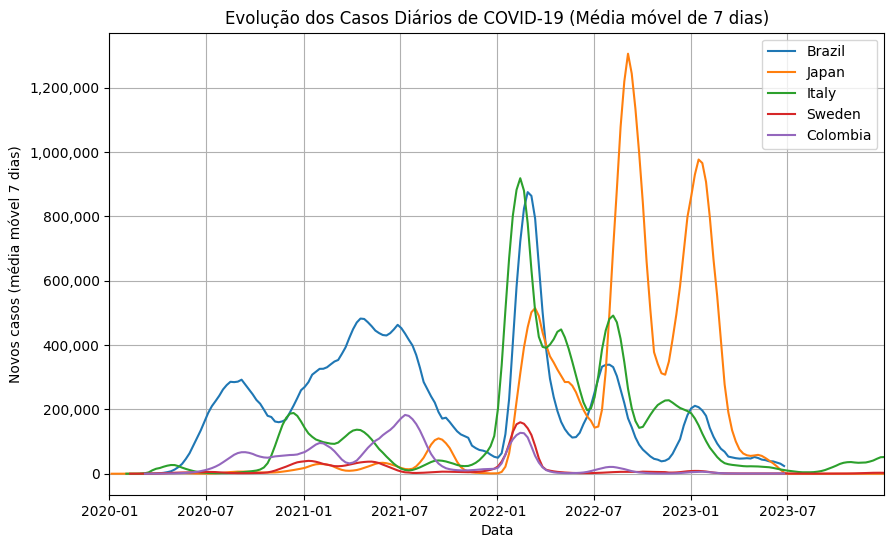

In [53]:
#Criando uma coluna na tabela com a média móvel
dados_agrupados["media_movel_7d"] = (
    dados_paises.groupby("Country")["New_cases"]
    .rolling(window=7, min_periods=1) #Esta linha usa a função rolling, que faz exatamente a média móvel
    .mean()
    .reset_index(drop=True))

plt.figure(figsize=(10,6))

for pais in paises:
    subset = dados_agrupados[dados_agrupados["Country"] == pais]
    plt.plot(subset["Date_reported"], subset["media_movel_7d"], label=pais)

plt.title("Evolução dos Casos Diários de COVID-19 (Média móvel de 7 dias)")
plt.xlabel("Data")
plt.ylabel("Novos casos (média móvel 7 dias)")
plt.legend()
plt.grid(True)

plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31"))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Criando um gráfico de casos em relação à população

Para fazermos comparações entre países de forma "justa", precisaremos ajustar os valores pela população de cada um, para isso, serão considerados os seguintes valores de população em 2021.


In [29]:
populacao = {"Brazil": 209550294,
             "Japan": 125681593,
             "Italy": 59133173,
             "Sweden": 10415811,
             "Colombia": 51188173}

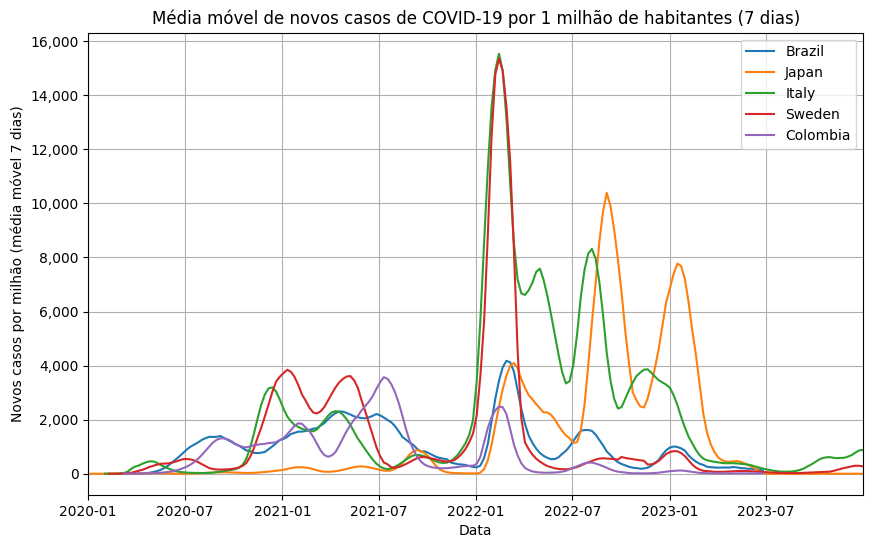

In [57]:
# Criar uma nova coluna 'media_movel_por_milhao' inicialmente vazia
dados_agrupados["media_movel_por_milhao"] = None

# Calcular o valor para cada país
for pais in paises:
    pop = populacao[pais]
    dados_agrupados.loc[
        dados_agrupados["Country"] == pais, "media_movel_por_milhao"
    ] = (dados_agrupados.loc[dados_agrupados["Country"] == pais, "media_movel_7d"] / pop) * 1_000_000

plt.figure(figsize=(10,6))

for pais in paises:
    subset = dados_agrupados[dados_agrupados["Country"] == pais]
    plt.plot(subset["Date_reported"], subset["media_movel_por_milhao"], label=pais)

plt.title("Média móvel de novos casos de COVID-19 por 1 milhão de habitantes (7 dias)")
plt.xlabel("Data")
plt.ylabel("Novos casos por milhão (média móvel 7 dias)")
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31"))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Usando a base de dados WHO-COVID-19-global-hosp-icu-data para criar um gráfico de média móvel de hospitalizações/milháo de habitantes

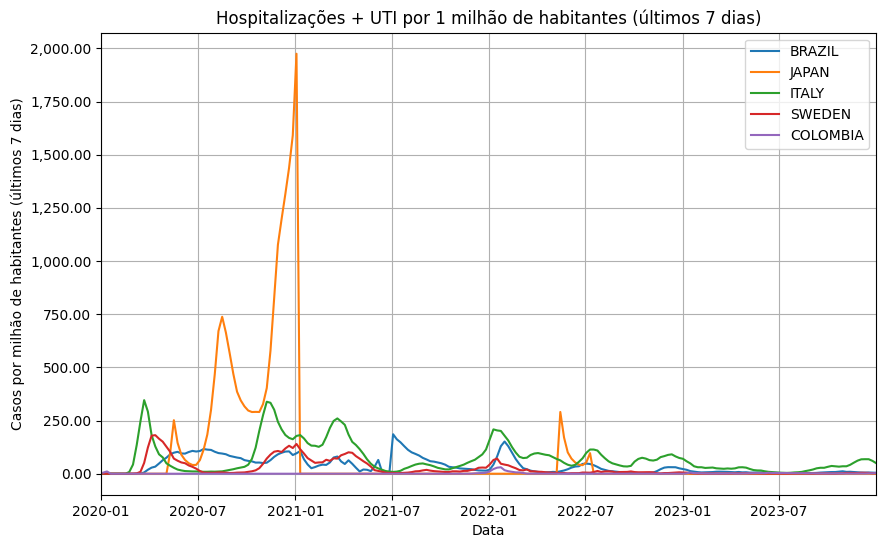

In [107]:
#Será muito semelhante ao realizado com os dados de novos casos.

populacao = {"BRAZIL": 209550294,
            "JAPAN": 125681593,
             "ITALY": 59133173,
             "SWEDEN": 10415811,
             "COLOMBIA": 51188173}

paises = ["BRAZIL", "JAPAN", "ITALY", "SWEDEN", "COLOMBIA"]
dados_hosp = hosp_icu.loc[hosp_icu["Country"].isin(paises)].copy()
dados_hosp["hosp_uti_7d"] = dados_hosp["Covid_new_hospitalizations_last_7days"].fillna(0) + dados_hosp["Covid_new_icu_admissions_last_7days"].fillna(0)

dados_hosp["Total_hosp_uti_por_milhao"] = None
for pais in paises:
    pop = populacao[pais]
    dados_hosp.loc[dados_hosp["Country"] == pais, "Total_hosp_uti_por_milhao"] = (
        dados_hosp.loc[dados_hosp["Country"] == pais, "hosp_uti_7d"] / pop) * 1000000

plt.figure(figsize=(10,6))

for pais in paises:
    subset = dados_hosp[dados_hosp["Country"] == pais]
    plt.plot(subset["Date_reported"], subset["Total_hosp_uti_por_milhao"], label=pais)

plt.title("Hospitalizações + UTI por 1 milhão de habitantes (últimos 7 dias)")
plt.xlabel("Data")
plt.ylabel("Casos por milhão de habitantes (últimos 7 dias)")
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31"))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))

plt.show()


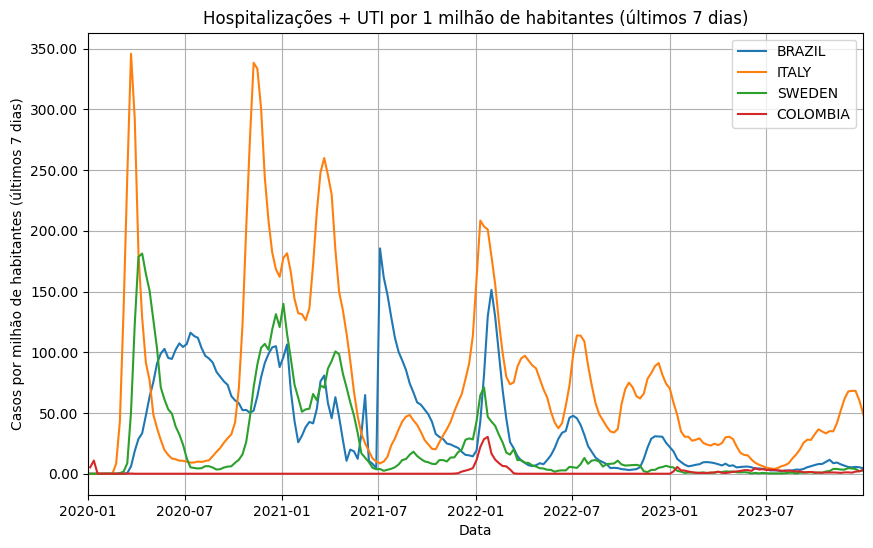

In [109]:
#Repetindo o código anterior sem Japão

populacao = {"BRAZIL": 209550294,
             "ITALY": 59133173,
             "SWEDEN": 10415811,
             "COLOMBIA": 51188173}

paises = ["BRAZIL", "ITALY", "SWEDEN", "COLOMBIA"]
dados_hosp = hosp_icu.loc[hosp_icu["Country"].isin(paises)].copy()
dados_hosp["hosp_uti_7d"] = dados_hosp["Covid_new_hospitalizations_last_7days"].fillna(0) + dados_hosp["Covid_new_icu_admissions_last_7days"].fillna(0)

dados_hosp["Total_hosp_uti_por_milhao"] = None
for pais in paises:
    pop = populacao[pais]
    dados_hosp.loc[dados_hosp["Country"] == pais, "Total_hosp_uti_por_milhao"] = (
        dados_hosp.loc[dados_hosp["Country"] == pais, "hosp_uti_7d"] / pop) * 1000000

plt.figure(figsize=(10,6))

for pais in paises:
    subset = dados_hosp[dados_hosp["Country"] == pais]
    plt.plot(subset["Date_reported"], subset["Total_hosp_uti_por_milhao"], label=pais)

plt.title("Hospitalizações + UTI por 1 milhão de habitantes (últimos 7 dias)")
plt.xlabel("Data")
plt.ylabel("Casos por milhão de habitantes (últimos 7 dias)")
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31"))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))

plt.show()


In [106]:
japao = hosp_icu[hosp_icu["Country"] == "JAPAN"].copy()
print(japao[["Date_reported", "Covid_new_hospitalizations_last_7days"]].head(50))

      Date_reported  Covid_new_hospitalizations_last_7days
111      2025-08-24                                    NaN
351      2025-08-17                                    NaN
591      2025-08-10                                    NaN
831      2025-08-03                                    NaN
1071     2025-07-27                                    NaN
1311     2025-07-20                                    NaN
1551     2025-07-13                                    NaN
1791     2025-07-06                                    NaN
2031     2025-06-29                                    NaN
2271     2025-06-22                                    NaN
2511     2025-06-15                                    NaN
2751     2025-06-08                                    NaN
2991     2025-06-01                                    NaN
3231     2025-05-25                                    NaN
3471     2025-05-18                                    NaN
3711     2025-05-11                                    N

Gráfico de média móvel de mortes, período de 7 dias

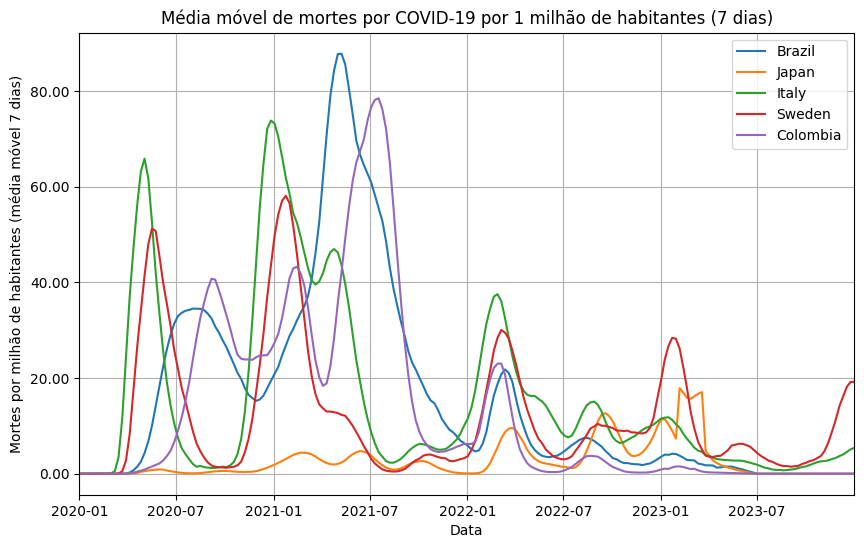

In [99]:
paises = ["Brazil", "Japan", "Italy", "Sweden", "Colombia"]
populacao = {"Brazil": 209550294,
            "Japan": 125681593,
             "Italy": 59133173,
             "Sweden": 10415811,
             "Colombia": 51188173}
dados_mortes = global_data.loc[global_data["Country"].isin(paises)].copy()

mortes_agrupadas = (
    dados_mortes.groupby(["Country", "Date_reported"])["New_deaths"]
    .sum()
    .reset_index()
)

# Calcular média móvel de 7 dias
mortes_agrupadas["media_movel_7d"] = (
    mortes_agrupadas.groupby("Country")["New_deaths"]
    .rolling(window=7, min_periods=1)
    .mean()
    .reset_index(drop=True))

mortes_agrupadas["mortes_por_milhao"] = None
for pais in paises:
    pop = populacao[pais]
    mortes_agrupadas.loc[mortes_agrupadas["Country"] == pais, "mortes_por_milhao"] = (
        mortes_agrupadas.loc[mortes_agrupadas["Country"] == pais, "media_movel_7d"] / pop
    ) * 1_000_000

plt.figure(figsize=(10,6))

for pais in paises:
    subset = mortes_agrupadas[mortes_agrupadas["Country"] == pais]
    plt.plot(subset["Date_reported"], subset["mortes_por_milhao"], label=pais)

plt.title("Média móvel de mortes por COVID-19 por 1 milhão de habitantes (7 dias)")
plt.xlabel("Data")
plt.ylabel("Mortes por milhão de habitantes (média móvel 7 dias)")
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31"))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))

plt.show()

Criando um gráfico de doses aplicadas em relação à população

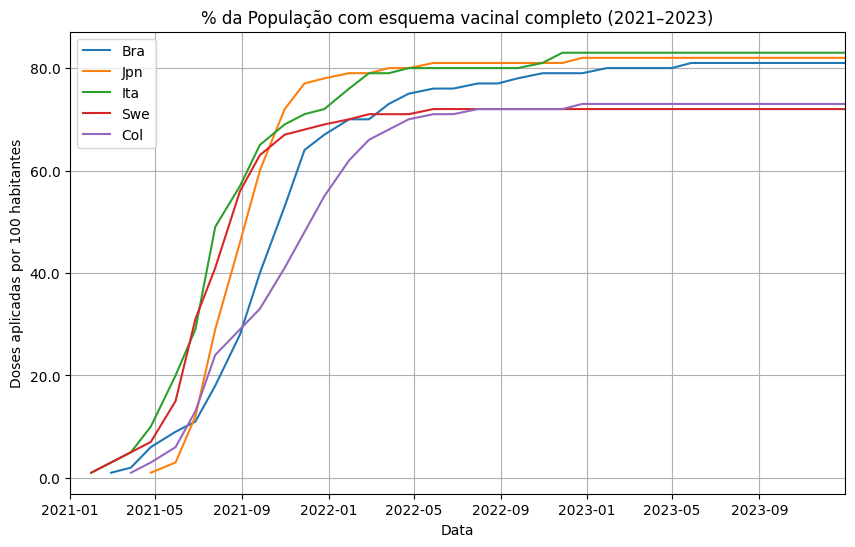

In [119]:
paises = ["BRA", "JPN", "ITA", "SWE", "COL"]

dados_vac = vac.loc[vac["COUNTRY"].isin(paises)].copy()

#Os dados da Italia estão fora de ordem cronológica, o que faz com que o gráfica faza um zig-zag
#Para corrigir, o equivalente de um orderby:
dados_vac = dados_vac.sort_values(["COUNTRY", "DATE"], ascending=[True, True])

plt.figure(figsize=(10,6))

for pais in paises:
    subset = dados_vac[dados_vac["COUNTRY"] == pais]
    plt.plot(subset["DATE"], subset["COVID_VACCINE_COV_TOT_CPS"], label=pais.title())

plt.title("% da População com esquema vacinal completo (2021–2023)")
plt.xlabel("Data")
plt.ylabel("Doses aplicadas por 100 habitantes")
plt.legend()
plt.grid(True)
plt.xlim(pd.to_datetime("2021-01-01"), pd.to_datetime("2023-12-31"))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.1f}'))

plt.show()


Criação de curvas normalizadas (sem valores em escala) para comparar sua variação ao início da vacinação e com a cobertura de 50% da população

In [134]:
def graf_normalizado(pais, sigla):

  casos = dados_agrupados[dados_agrupados["Country"] == pais]
  hosp = dados_hosp[dados_hosp["Country"] == pais]
  #mortes = dados_mortes[mortes_agrupadas["Country"] == pais]
  vac_pais = dados_vac[dados_vac["COUNTRY"] == sigla].copy()

  vac_pais["DATE"] = pd.to_datetime(vac_pais["DATE"])
  vac_pais = vac_pais.sort_values("DATE")


  casos_norm = casos["media_movel_7d"] / casos["media_movel_7d"].max()
  hosp_norm = hosp["Total_hosp_uti_por_milhao"] / hosp["Total_hosp_uti_por_milhao"].max()
  #mortes_norm = mortes["mortes_por_milhao"] / mortes["mortes_por_milhao"].max()

#Linhas verticais no inicio da vacinação e em 50% de pessoas completamente imunizadas
  inicio_vac = vac_pais.loc[vac_pais["COVID_VACCINE_COV_TOT_CPS"] > 0, "DATE"].min()
  meia_vac = vac_pais.loc[vac_pais["COVID_VACCINE_COV_TOT_CPS"] >= 50, "DATE"].min()
  if pd.notna(inicio_vac):
        plt.axvline(inicio_vac, color="gray", linestyle="--", linewidth=1.5, label="Início vacinação")
  if pd.notna(meia_vac):
        plt.axvline(meia_vac, color="green", linestyle="--", linewidth=1.5, label="50% vacinados")

#plotagem
  plt.title(f"{pais.title()} — Evolução normalizada de casos, hospitalizações e mortes")
  plt.xlabel("Data")
  plt.ylabel("Valor normalizado (0–1)")
  plt.legend()
  plt.grid(True)
  plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2023-12-31"))

  plt.show()

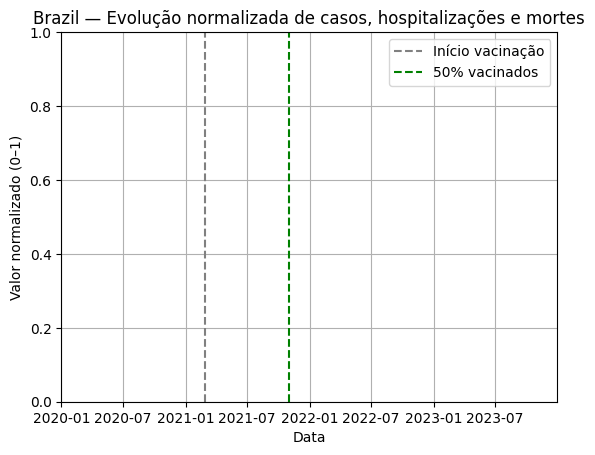

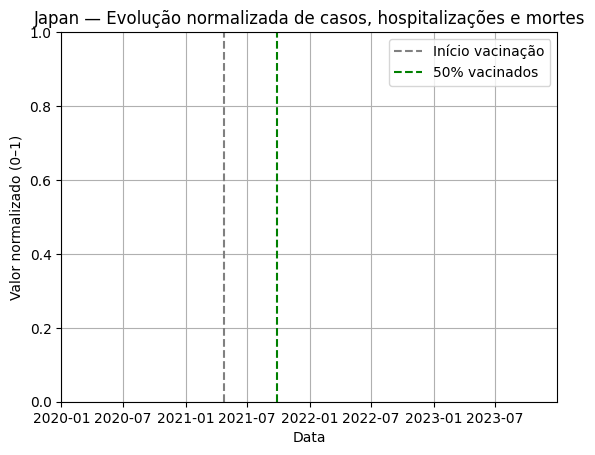

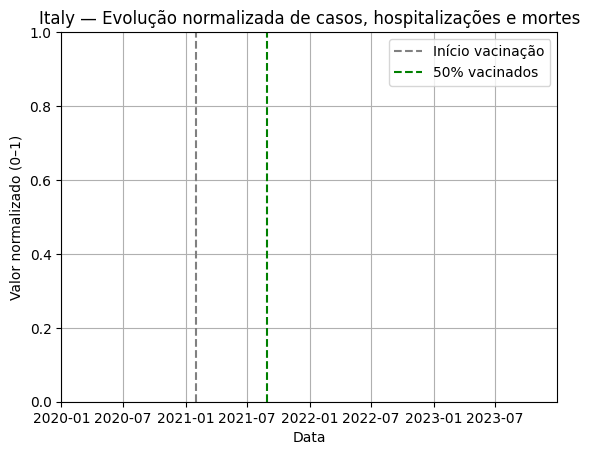

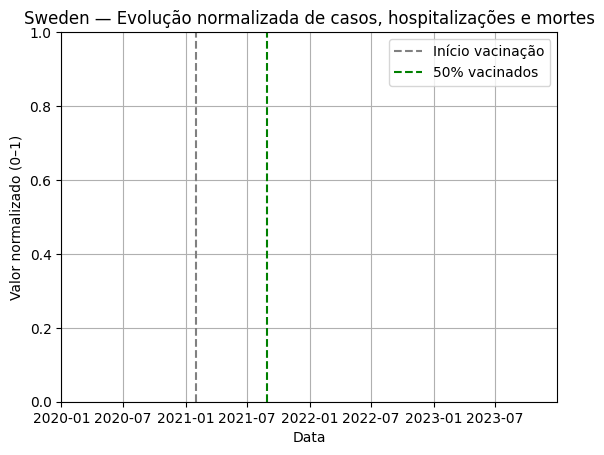

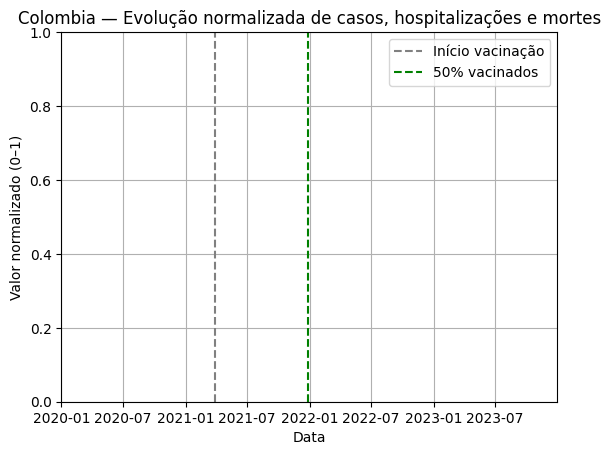

In [136]:
graf_normalizado("Brazil", 'BRA')
graf_normalizado('Japan', 'JPN')
graf_normalizado('Italy', 'ITA')
graf_normalizado('Sweden', 'SWE')
graf_normalizado('Colombia', 'COL')

